In [1]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Part 1: Preprocessing
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the dataset
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #.values creates the numpy array

In [4]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60 : i, 0]) #60 stock prices
    Y_train.append(training_set_scaled[i, 0]) #t+1 timestamp stock price for predicting the next output
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
#Reshaping the unit #Adding the new dimentions to the array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
#Part 2: Building the RNN: Stack LSTMs
#Importing the keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
#Initialising the RNNs
regressor = Sequential()

In [9]:
#Adding first layers and Dropout regularization
#Input_shape = 2nd and 3rd shape is considered, because 3rd will be automatically taken into account
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [10]:
#Adding second layers and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
#Adding third layers and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
#Adding fourth layers and Dropout regularization 
regressor.add(LSTM(units = 50)) #For final layer, we don't need any return ouputs
regressor.add(Dropout(0.2)) 

In [13]:
#Final/Output Layer 
regressor.add(Dense(units = 1))

In [14]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
#Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 57s - loss: 0.0463    
Epoch 2/100
1198/1198 [==============================] - 38s - loss: 0.0074    
Epoch 3/100
1198/1198 [==============================] - 64s - loss: 0.0062    
Epoch 4/100
1198/1198 [==============================] - 36s - loss: 0.0056    
Epoch 5/100
1198/1198 [==============================] - 69s - loss: 0.0051    
Epoch 6/100
1198/1198 [==============================] - 72s - loss: 0.0051    
Epoch 7/100
1198/1198 [==============================] - 79s - loss: 0.0054    
Epoch 8/100
1198/1198 [==============================] - 77s - loss: 0.0050    
Epoch 9/100
1198/1198 [==============================] - 81s - loss: 0.0048    
Epoch 10/100
1198/1198 [==============================] - 93s - loss: 0.0042    
Epoch 11/100
1198/1198 [==============================] - 63s - loss: 0.0046    
Epoch 12/100
1198/1198 [==============================] - 78s - loss: 0.0039    
Epoch 13/100
1198/1198 [=============

In [16]:
#Part 3: Making the predictions and visualising the results
#Getting real stock price of 2017
#Importing the test dataset
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
#Getting predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [18]:
#Creating a data structure with 60 timesteps and 1 output
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60 : i, 0]) #60 stock prices
X_test = np.array(X_test)

In [19]:
#Reshaping the unit #Adding the new dimentions to the array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
#predict the test values 
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[787.1098 ]
 [784.28467]
 [783.6103 ]
 [784.6879 ]
 [787.91534]
 [793.70996]
 [799.80664]
 [803.3081 ]
 [804.2533 ]
 [803.8271 ]
 [803.1119 ]
 [802.53546]
 [802.223  ]
 [802.5732 ]
 [803.4413 ]
 [807.2377 ]
 [813.7874 ]
 [821.60046]
 [827.01105]
 [825.0495 ]]


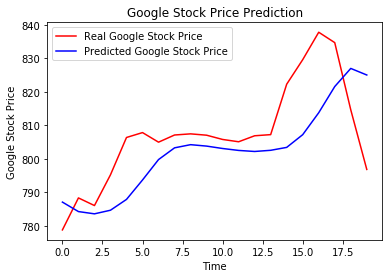

In [24]:
#Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
ply.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
ply.show()